# Data Scientist Challenge

## Goal
As a TRI-AD data scientist you will need to have strong analytical skills as well as
experience building software and strong communication skills. This technical
challenge will cover all three of these components using a sample data set.
You will be provided with a data set about students. The data set includes
information about the students’ age, nationality, gender, as well as information
about their studying habits. There is also a binary column expressing whether or not
the students passed an important test.

## Part 1: Analysis
- Describe the demographic details of people most likely to pass the test
- Describe the efficacy of the two interventions - the test prep course and the
Dojo class
- Identify any other interesting trends from the data set and offer some analysis
as to their importance or cause.

## Part 2: Model Creation
Create a model that can predict whether or not a student will pass the test. Use the
provided data set to train your model and test its accuracy. You have free choice of
programming language, algorithm, and tools.


## Part 3: Reporting
The goal in the final stage is to communicate your findings to less technical
management staff. There are two requirements:
- Create visualizations to show the efficacy of your model. A non-data scientist
should be able to infer at a glance how well it fits the data.
- Offer ideas for how we might help more people pass the test and create more
accurate models based on your findings. Summarize with bullet points and
consider adding more visuals.

## Data Overview

| column | additional information | relevance? |
|--------|------------------------|--------------------|
| age | age of patient | Age is the most important risk factor in developing cardiovascular or heart diseases, with approximately a tripling of risk with each decade of life. Coronary fatty streaks can begin to form in adolescence. It is estimated that 82 percent of people who die of coronary heart disease are 65 and older. Simultaneously, the risk of stroke doubles every decade after age 55.|
| sex | gender of patient | Men are at greater risk of heart disease than pre-menopausal women. Once past menopause, it has been argued that a woman’s risk is similar to a man’s although more recent data from the WHO and UN disputes this. If a female has diabetes, she is more likely to develop heart disease than a male with diabetes.|
| chest_pain_type  | 1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic | Angina is chest pain or discomfort caused when your heart muscle doesn’t get enough oxygen-rich blood. It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, or back. Angina pain may even feel like indigestion.|
| resting_blood_pressure |  | Over time, high blood pressure can damage arteries that feed your heart. High blood pressure that occurs with other conditions, such as obesity, high cholesterol or diabetes, increases your risk even more.|
| fasting_blood_sugar | > 120 mg/dl, 1 = true, 0 = false | Not producing enough of a hormone secreted by your pancreas (insulin) or not responding to insulin properly causes your body’s blood sugar levels to rise, increasing your risk of a heart attack.|
| thal | 0 = normal, 1 = fixed defect, 2 = reversable defect
| serum_cholestoral | in mg/dl | A high level of low-density lipoprotein (LDL) cholesterol (the “bad” cholesterol) is most likely to narrow arteries. A high level of triglycerides, a type of blood fat related to your diet, also ups your risk of a heart attack. However, a high level of high-density lipoprotein (HDL) cholesterol (the “good” cholesterol) lowers your risk of a heart attack.|
| resting_electrocardiographic_results | 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria | For people at low risk of cardiovascular disease, the USPSTF concludes with moderate certainty that the potential harms of screening with resting or exercise ECG equal or exceed the potential benefits. For people at intermediate to high risk, current evidence is insufficient to assess the balance of benefits and harms of screening.|
| maximum_heartrate_achieved | |  The increase in cardiovascular risk, associated with the acceleration of heart rate, was comparable to the increase in risk observed with high blood pressure. It has been shown that an increase in heart rate by 10 beats per minute was associated with an increase in the risk of cardiac death by at least 20%, and this increase in the risk is similar to the one observed with an increase in systolic blood pressure by 10 mm Hg.|
| exercise_induced_angina | 1 = yes, 0 = no | Exercise induced angina: The pain or discomfort associated with angina usually feels tight, gripping or squeezing, and can vary from mild to severe. Angina is usually felt in the center of your chest but may spread to either or both of your shoulders, or your back, neck, jaw or arm. It can even be felt in your hands. o Types of Angina a. Stable Angina / Angina Pectoris b. Unstable Angina c. Variant (Prinzmetal) Angina d. Microvascular Angina|
| oldpeak | ST depression induced by exercise relative to rest | A treadmill ECG stress test is considered abnormal when there is a horizontal or down-sloping ST-segment depression ≥ 1 mm at 60–80 ms after the J point. Exercise ECGs with up-sloping ST-segment depressions are typically reported as an ‘equivocal’ test. In general, the occurrence of horizontal or down-sloping ST-segment depression at a lower workload (calculated in METs) or heart rate indicates a worse prognosis and higher likelihood of multi-vessel disease. The duration of ST-segment depression is also important, as prolonged recovery after peak stress is consistent with a positive treadmill ECG stress test. Another finding that is highly indicative of significant CAD is the occurrence of ST-segment elevation > 1 mm (often suggesting transmural ischemia); these patients are frequently referred urgently for coronary angiography.|
| slope_of_the_peak_exercise_st_segment | 1= upsloping, 2 = flat, 3 = downsloping | |
| number_of_major_vessels_colored_by_flourosopy | |
| real_data | tag to distinguish between real and made up data | |
| heart_attack | 0 = little risk of heart attack, 1 = high risk of heart attack || 

# Phase 1: Data Import and Exploration

## 1. Import the data from the database:

* Use DBeaver or any other suitable tool to connect to the database and retrieve the data from the 'heart' schema.
* Consider using SQL queries to join relevant tables if necessary.

In [409]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
)

# models
import xgboost as xgb
import lightgbm as lgb

# Define a plotting style to be used for all plots in this notebook
plt.style.use("tableau-colorblind10")

In [410]:
# Read database string from .env file (no need to change anything)
load_dotenv()

DB_STRING = os.getenv('DB_STRING')

db = create_engine(DB_STRING)

In [411]:
# Define query to download data (add your query here)
query_string = """SET SCHEMA 'heart';
		SELECT 	p.id as patient_id,
		p.age, 
		p.sex, 
		cp.chest_pain_type,
		bm.serum_cholestoral, 
		bm.fasting_blood_sugar,
		bm.thal, 
		pva.resting_blood_pressure,
		pva.resting_electrocardiographic_results AS resting_ecg,
		pva.maximum_heartrate_achieved AS max_heartrate,
		pva.exercise_induced_angina,
		pva.oldpeak,
		pva.slope_of_the_peak_exercise_st_segment as st_slope,
		pva.number_of_major_vessels_colored_by_flourosopy AS major_vessels,
		pva.real_data,
		hah.heart_attack
		FROM patient p
		LEFT JOIN chest_pain cp ON p.id = cp.patient_id
		LEFT JOIN blood_metrics bm ON p.id = bm.patient_id
		LEFT JOIN pressure_vessels_angina pva ON p.id = pva.patient_id
		LEFT JOIN heart_attack_history hah ON p.id = hah.patient_id
WHERE pva.real_data != 'Evgeny likes white wine for lunch and red wine for dinner' OR pva.real_data IS NULL
ORDER BY p.id ASC;"""



## 2. Conduct a brief EDA (Exploratory Data Analysis):

* Load the data into a Pandas DataFrame or your preferred data manipulation tool.

In [412]:
df = pd.read_sql(query_string, db)
df.to_csv("heart_data_2.csv", index=False)


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   patient_id               353 non-null    int64  
 1   age                      343 non-null    float64
 2   sex                      334 non-null    float64
 3   chest_pain_type          303 non-null    float64
 4   serum_cholestoral        303 non-null    float64
 5   fasting_blood_sugar      303 non-null    float64
 6   thal                     303 non-null    float64
 7   resting_blood_pressure   303 non-null    float64
 8   resting_ecg              303 non-null    float64
 9   max_heartrate            292 non-null    float64
 10  exercise_induced_angina  303 non-null    float64
 11  oldpeak                  303 non-null    float64
 12  st_slope                 303 non-null    float64
 13  major_vessels            303 non-null    float64
 14  real_data                2

**Setting binary & categorial data types**

In [414]:
# Define a dictionary to map values to labels for chest_pain_type
chest_pain_labels = {
    1: "typical angina",
    2: "atypical angina",
    3: "non-anginal pain",
    4: "asymptomatic",
    None : "unknown"
}
# Set "chest_pain_type" as categorical with custom category labels
df["chest_pain_type"] = df["chest_pain_type"].map(chest_pain_labels).astype("category")


# Define a dictionary to map values to labels for thal
thal_labels = {
    0: "normal",
    1: "fixed defect",
    2: "reverse defect",
    None : "unknown"
}
# Set "chest_pain_type" as categorical with custom category labels
df["thal"] = df["thal"].map(thal_labels).astype("category")


# define a dictionary to map values to labels for resting_ecg
resting_ecg_labels = {
    0: "normal",
    1: "ST-T wave abnormality",
    2: "showing probable or definite left ventricular hypertrophy",
    None : "unknown"

}

# Set "resting_ecg" as categorical with custom category labels
df["resting_ecg"] = df["resting_ecg"].map(resting_ecg_labels).astype("category")


# Define a dictionary to map values to labels for st_slope
st_slope_labels = {
    1: "upsloping",
    2: "flat",
    3: "downsloping",
    None : "unknown"
}
# Set "st_slope" as categorical with custom category labels
df["st_slope"] = df["st_slope"].map(st_slope_labels).astype("category")


#Define a dictionary to map values to labels for sex
sex_labels = {
    0 : "male",
    1 : "female",
    None : "unknown"
}
#Set sex as categorical with custom category labels
df["sex"] = df["sex"].map(sex_labels).astype("category")


# Set "exercise_induced_angina" as binary
df["exercise_induced_angina"] = df["exercise_induced_angina"].astype("bool")

# Set "heart_attack" as binary
df["heart_attack"] = df["heart_attack"].astype("bool")

# Print the data types to verify
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               353 non-null    int64   
 1   age                      343 non-null    float64 
 2   sex                      353 non-null    category
 3   chest_pain_type          210 non-null    category
 4   serum_cholestoral        303 non-null    float64 
 5   fasting_blood_sugar      303 non-null    float64 
 6   thal                     236 non-null    category
 7   resting_blood_pressure   303 non-null    float64 
 8   resting_ecg              353 non-null    category
 9   max_heartrate            292 non-null    float64 
 10  exercise_induced_angina  353 non-null    bool    
 11  oldpeak                  303 non-null    float64 
 12  st_slope                 332 non-null    category
 13  major_vessels            303 non-null    float64 
 14  real_data 

* Explore the data using summary statistics, histograms, and visualizations.

**Summary statistics**

In [415]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
patient_id,353.0,NaN,NaN,NaN,179.470255,107.842029,0.0,88.0,176.0,264.0,401.0
age,343.0,NaN,NaN,NaN,54.80758,12.484528,20.0,46.0,55.0,62.0,98.0
sex,353,3,female,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chest_pain_type,210,4,atypical angina,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
serum_cholestoral,303.0,NaN,NaN,NaN,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,NaN,NaN,NaN,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
thal,236,4,reverse defect,166,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resting_blood_pressure,303.0,NaN,NaN,NaN,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
resting_ecg,353,4,ST-T wave abnormality,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_heartrate,292.0,NaN,NaN,NaN,149.726027,23.177493,71.0,133.75,153.0,167.25,202.0


***Import seaborn as sns***  
***Import matplotlib.pyplot as plt***

In [416]:
import seaborn as sns
import matplotlib.pyplot as plt

In [417]:
df.head()

,patient_id,age,sex,chest_pain_type,serum_cholestoral,fasting_blood_sugar,thal,resting_blood_pressure,resting_ecg,max_heartrate,exercise_induced_angina,oldpeak,st_slope,major_vessels,real_data,heart_attack
0,0,63.0,female,non-anginal pain,233.0,1.0,fixed defect,145.0,normal,150.0,False,2.3,NaN,0.0,real data,True
1,1,NaN,female,atypical angina,250.0,0.0,reverse defect,130.0,ST-T wave abnormality,187.0,False,3.5,NaN,0.0,real data,True
2,2,41.0,male,typical angina,204.0,0.0,reverse defect,130.0,normal,172.0,False,1.4,flat,0.0,real data,True
3,3,56.0,female,typical angina,236.0,0.0,reverse defect,120.0,ST-T wave abnormality,178.0,False,0.8,flat,0.0,real data,True
4,4,57.0,male,NaN,354.0,0.0,reverse defect,120.0,ST-T wave abnormality,163.0,True,0.6,flat,0.0,None,True


**Histograms**

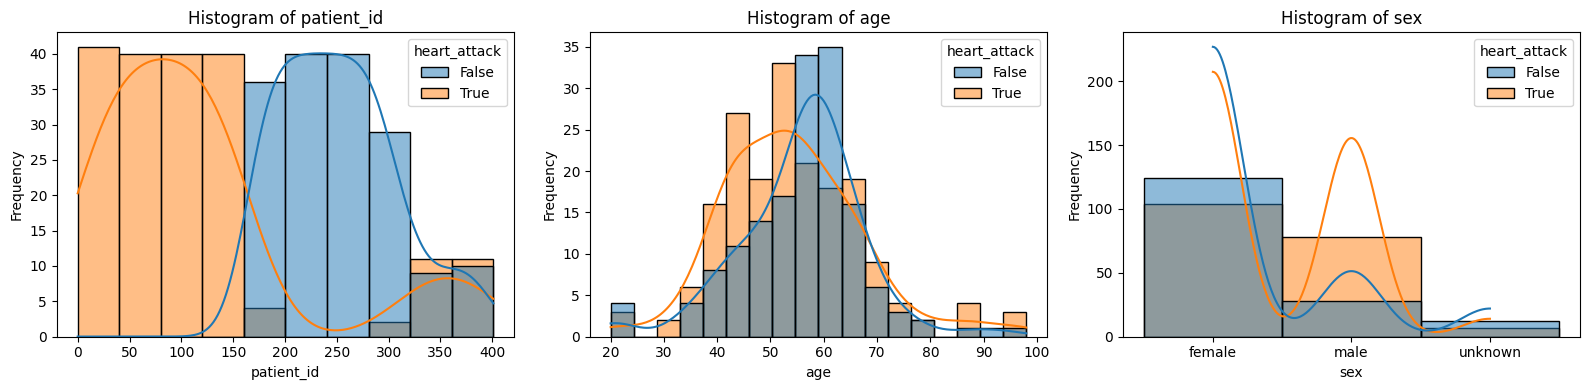

In [418]:
# Create a figure and axes for the grid
fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # Adjust the figsize as needed

# Define the list of variable names
variables = df.columns[0:3]

# Loop through each variable and create a histogram
for i, variable in enumerate(variables):
    sns.histplot(data=df, x=variable, kde=True, hue='heart_attack', ax=axes[i])
    axes[i].set_title(f'Histogram of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')

# Adjust layout and spacing
plt.tight_layout()

# Show the grid of histograms
plt.show()

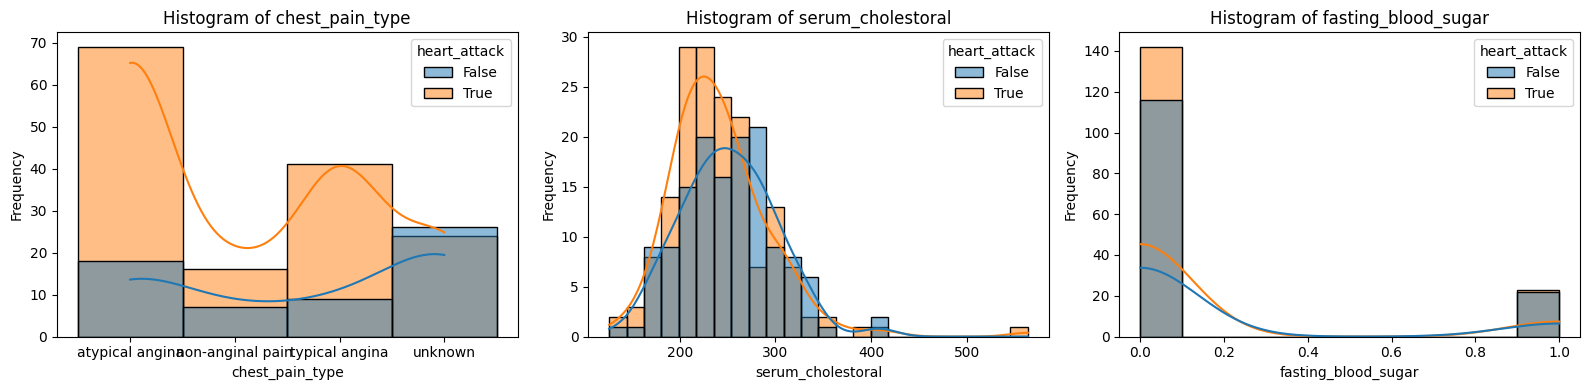

In [419]:
# Create a figure and axes for the grid
fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # Adjust the figsize as needed

# Define the list of variable names
variables = df.columns[3:6]

# Loop through each variable and create a histogram
for i, variable in enumerate(variables):
    sns.histplot(data=df, x=variable, kde=True,  hue='heart_attack',ax=axes[i])
    axes[i].set_title(f'Histogram of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')

# Adjust layout and spacing
plt.tight_layout()

# Show the grid of histograms
plt.show()

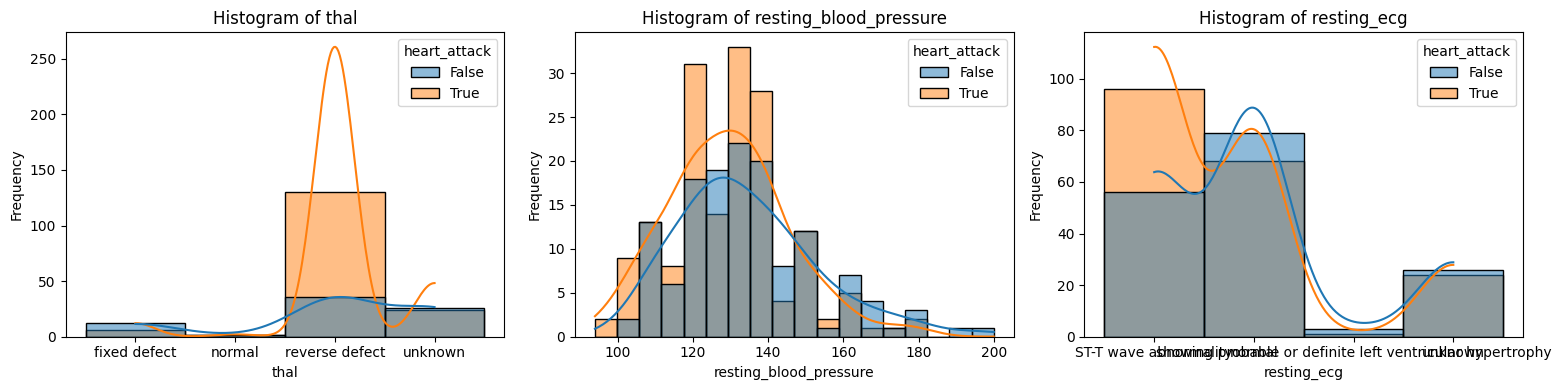

In [420]:
# Create a figure and axes for the grid
fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # Adjust the figsize as needed

# Define the list of variable names
variables = df.columns[6:9]

# Loop through each variable and create a histogram
for i, variable in enumerate(variables):
    sns.histplot(data=df, x=variable, kde=True,  hue='heart_attack',ax=axes[i])
    axes[i].set_title(f'Histogram of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')

# Adjust layout and spacing
plt.tight_layout()

# Show the grid of histograms
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


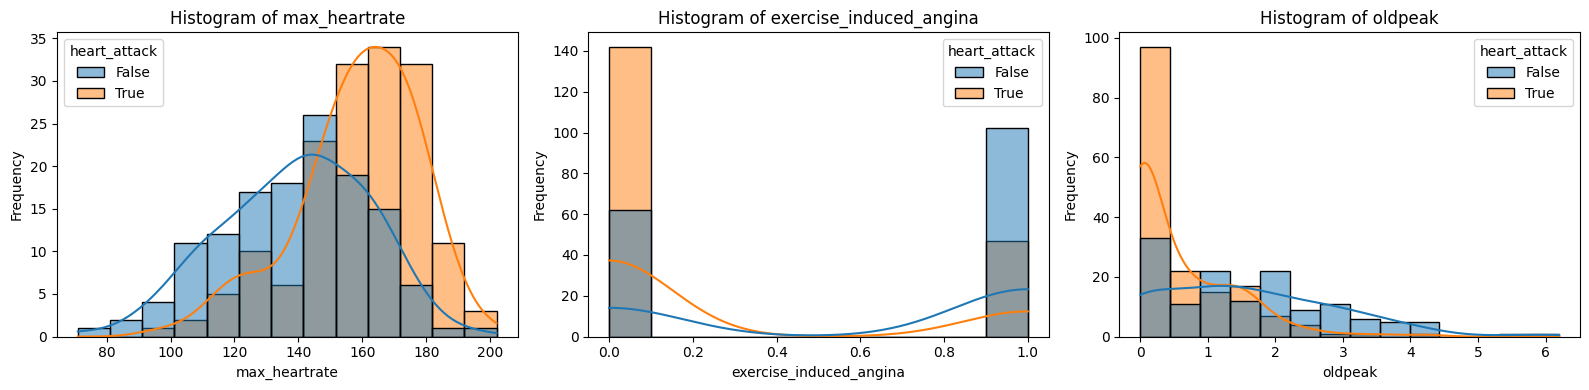

In [421]:
# Create a figure and axes for the grid
fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # Adjust the figsize as needed

# Define the list of variable names
variables = df.columns[9:12]

# Loop through each variable and create a histogram
for i, variable in enumerate(variables):
    sns.histplot(data=df, x=variable, kde=True,  hue='heart_attack',ax=axes[i])
    axes[i].set_title(f'Histogram of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')

# Adjust layout and spacing
plt.tight_layout()

# Show the grid of histograms
plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


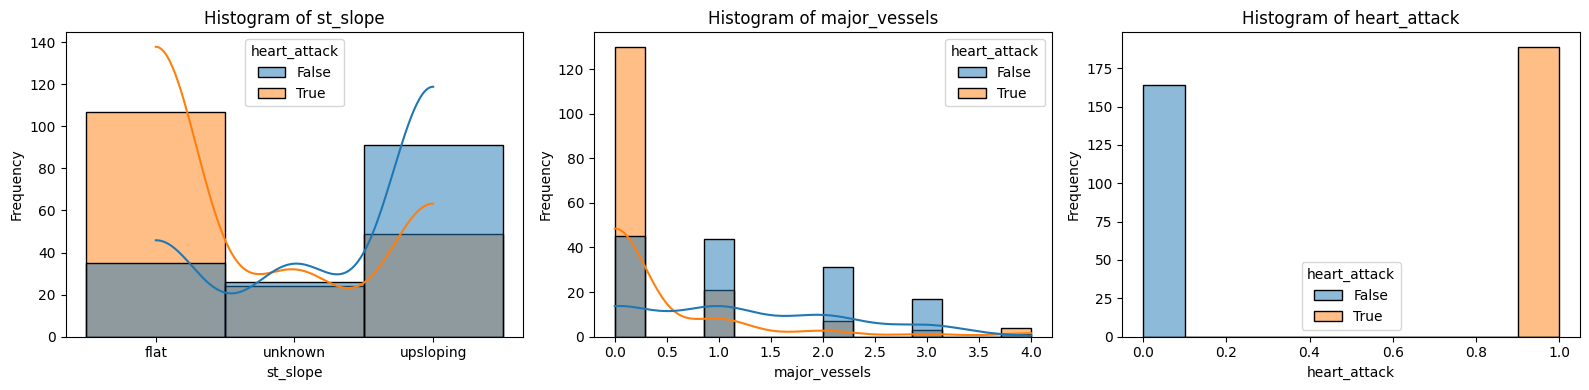

In [422]:
# Create a figure and axes for the grid
fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # Adjust the figsize as needed

# Define the list of variable names
variables = df.columns[[12,13,15]]

# Loop through each variable and create a histogram
for i, variable in enumerate(variables):
    sns.histplot(data=df, x=variable, kde=True,  hue='heart_attack',ax=axes[i])
    axes[i].set_title(f'Histogram of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')

# Adjust layout and spacing
plt.tight_layout()

# Show the grid of histograms
plt.show()

**Barplotting**

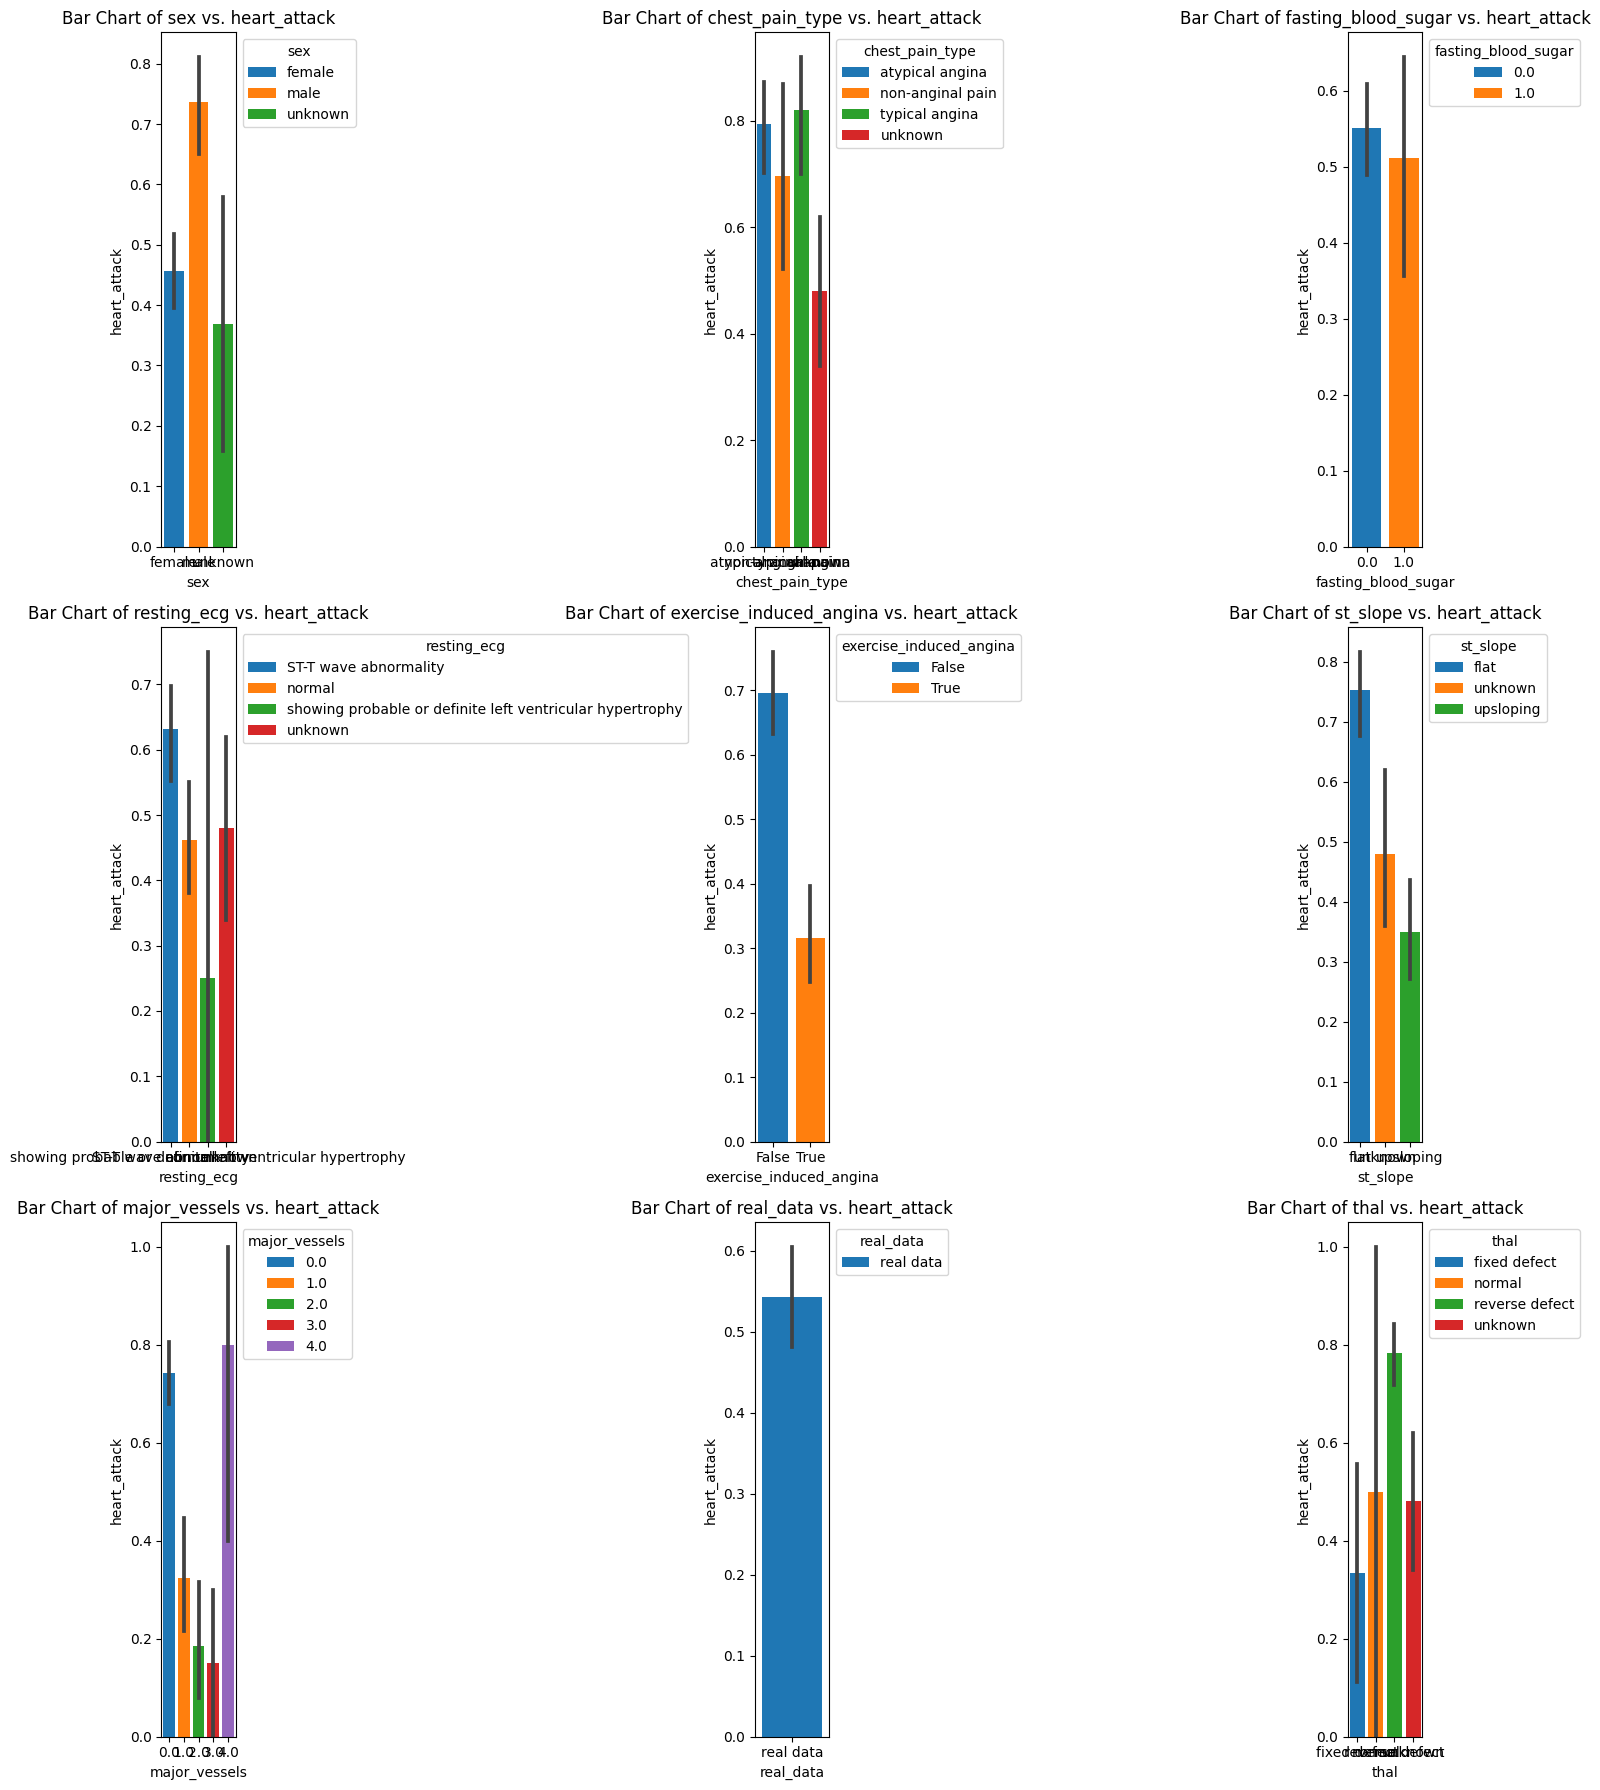

In [423]:
# Create a figure and axes for the grid
fig, axes = plt.subplots(3, 3, figsize=(15, 18))  # 3 rows, 3 columns

# Define the list of variable names (excluding 'heart_attack')
variables = ['sex', 'chest_pain_type', 'fasting_blood_sugar',
             'resting_ecg', 'exercise_induced_angina',
             'st_slope', 'major_vessels', 'real_data', 'thal']

# Set the desired bar width
bar_width = 2 # Adjust this value as needed

# Loop through each variable and create a bar chart against 'heart_attack' with 'hue'
for i, variable in enumerate(variables):
    row, col = divmod(i, 3)  # Calculate the row and column for the current variable
    
    sns.barplot(data=df, x=variable, y='heart_attack', hue=variable, dodge=False, ax=axes[row, col], saturation=bar_width)
    axes[row, col].set_title(f'Bar Chart of {variable} vs. heart_attack')
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('heart_attack')
    
    # Activate the legend for each plot
    axes[row, col].legend(title=variable)
     # Activate the legend for each plot and place it outside the axis area
    axes[row, col].legend(title=variable, loc='upper left', bbox_to_anchor=(1, 1))

# Remove any empty subplots using numpy to flatten
num_variables = len(variables)
num_rows, num_cols = divmod(num_variables, 3)
axes = axes.flatten()
for i in range(num_variables, 3 * 3):
    fig.delaxes(axes[i])

# Adjust layout and spacing
plt.tight_layout()

# Show the grid of bar charts
plt.show()

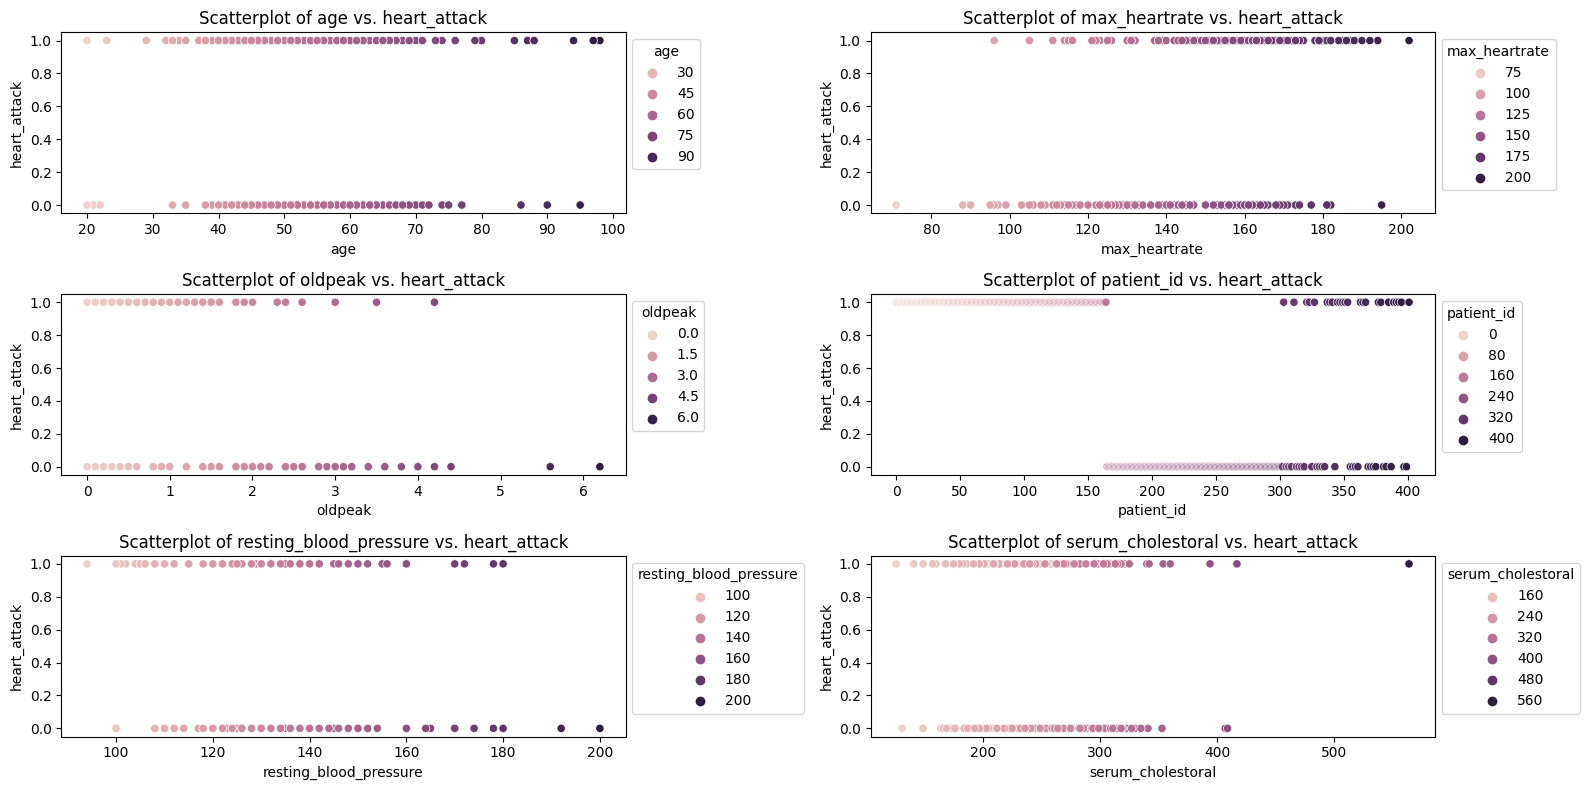

In [424]:
# Define the list of variable names (excluding 'heart_attack')
variables_ex = df.columns.difference(variables).tolist()
variables_ex.remove('heart_attack')

# Calculate the number of rows and columns needed for the grid
num_rows = len(variables_ex) // 2  # 2 scatterplots per row
num_cols = 2  # 2 columns for the scatterplots

# Create a figure and axes for the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 8))

# Loop through each variable in variables_ex and create a scatterplot with 'hue' against 'heart_attack'
for i, variable in enumerate(variables_ex):
    row, col = divmod(i, num_cols)  # Calculate the row and column for the current variable
    
    sns.scatterplot(data=df, x=variable, y='heart_attack', hue=variable, ax=axes[row, col])
    axes[row, col].set_title(f'Scatterplot of {variable} vs. heart_attack')
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel('heart_attack')
    
    # Activate the legend for each plot and place it outside the axis area
    axes[row, col].legend(title=variable, loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout and spacing
plt.tight_layout()

# Show the grid of scatterplots
plt.show()

* Identify missing values, outliers, and any data quality issues.

Identify Missing Values:

Check for missing values in the dataset and visualize them.
Consider using a heatmap or a bar chart to visualize missing data.  
Decide on a strategy for handling missing values based on the extent of missingness and the nature of the data.  


**Import missingno as msno**

In [425]:
import missingno as msno

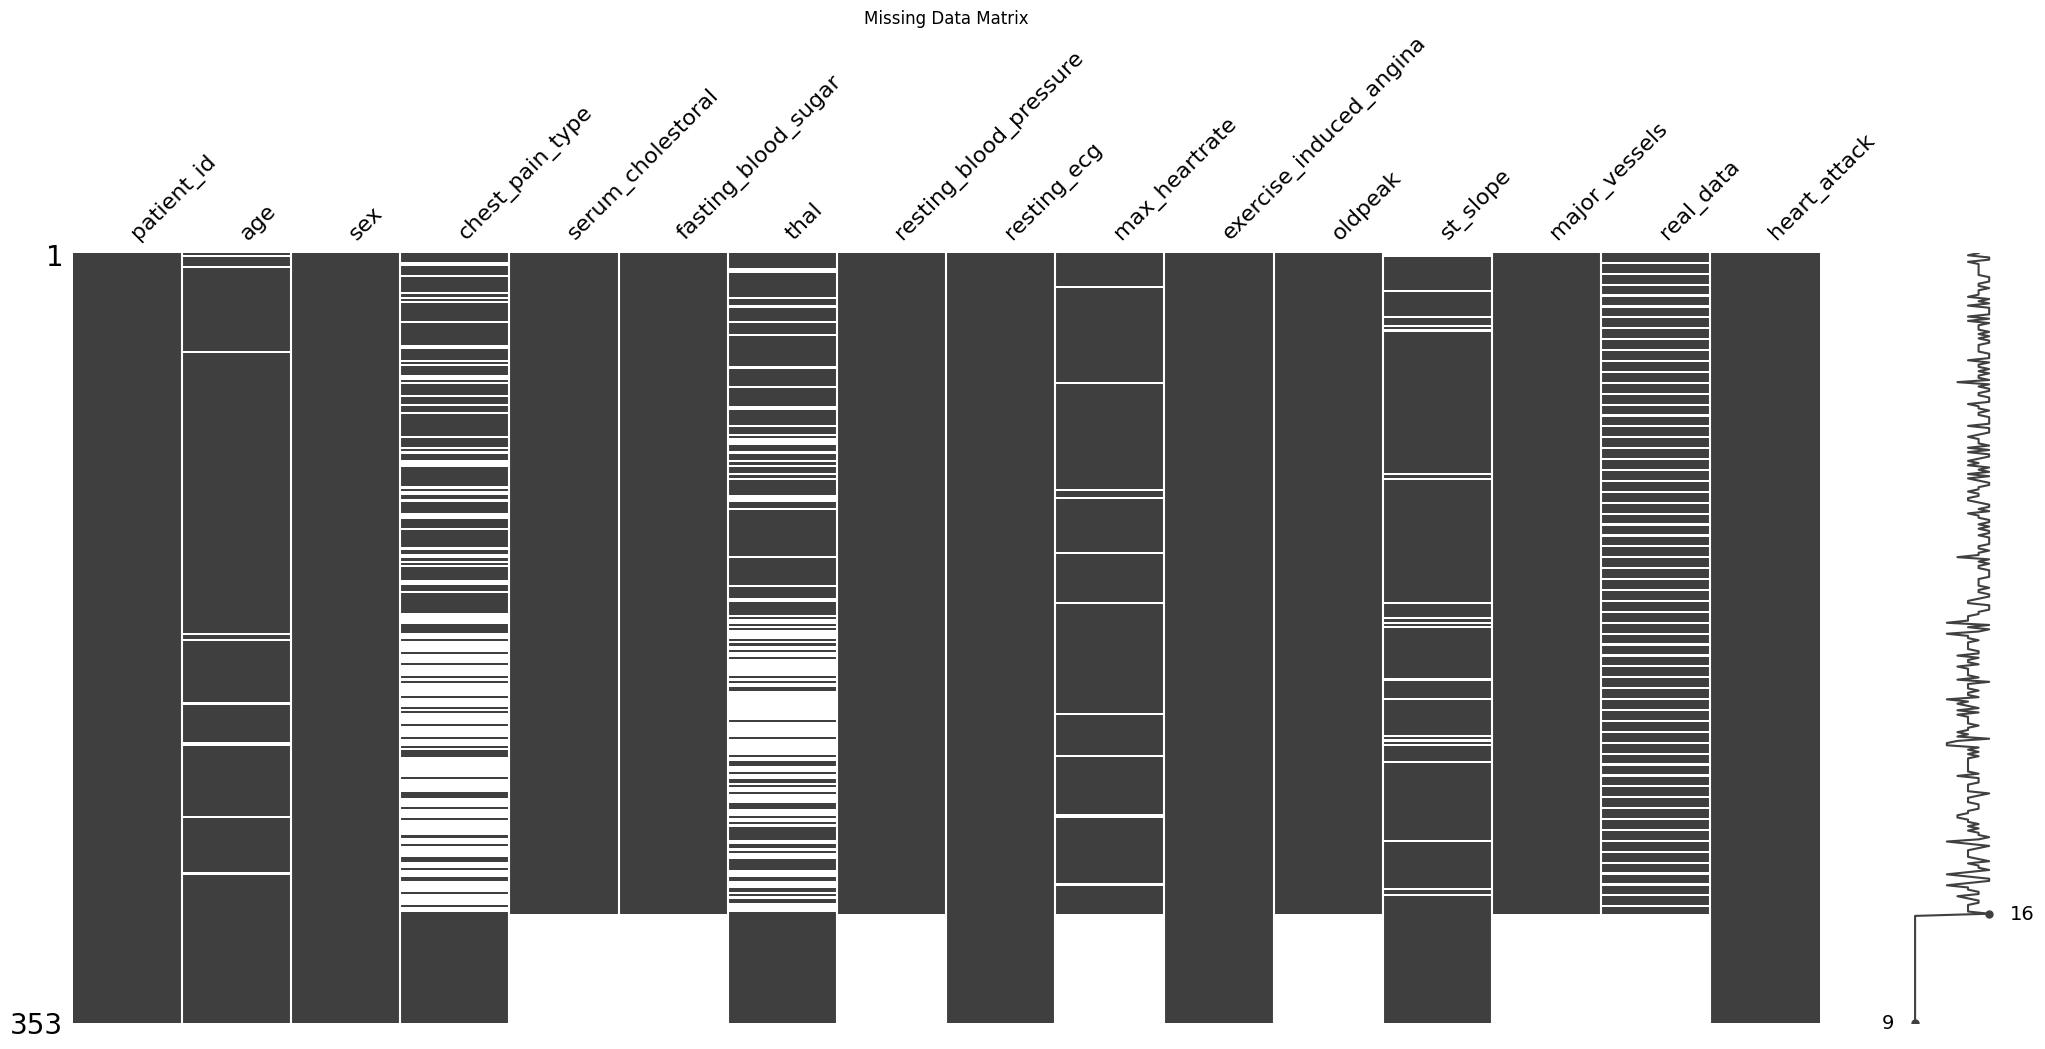

In [426]:
# Plot the missingness matrix of df as a heatmap
msno.matrix(df)

# Get the current Axes
ax = plt.gca()

# Add a title using Seaborn's set_title function
ax.set_title("Missing Data Matrix")

# Show the plot
plt.show()

In [427]:
# missing values detection
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
patient_id                   0
age                         10
sex                          0
chest_pain_type            143
serum_cholestoral           50
fasting_blood_sugar         50
thal                       117
resting_blood_pressure      50
resting_ecg                  0
max_heartrate               61
exercise_induced_angina      0
oldpeak                     50
st_slope                    21
major_vessels               50
real_data                  110
heart_attack                 0
dtype: int64


In [428]:
# check for mixed datatypes (quick and dirty)
string = ''

for column in df.columns:
    if df[column].apply(type).nunique() > 1:
        string += (f'Inconsistent data types in column (rough testing): {column}')

print(string)

Inconsistent data types in column (rough testing): real_data


In [429]:
#check for mixed datatypes (more sensitively)
for column in df.columns:
    weird = (df[[column]].applymap(type) != df[[column]].iloc[0].apply(type)).any(axis=1)
    if len(df[weird]) > 0:
        print(f'Inconsistent data types in column (sensitive testing): {column}')

Inconsistent data types in column (sensitive testing): chest_pain_type
Inconsistent data types in column (sensitive testing): thal
Inconsistent data types in column (sensitive testing): st_slope
Inconsistent data types in column (sensitive testing): real_data


* Gain an understanding of the data distribution and relationships between variables.

**Crosstabs**

In [430]:
# Kreuztabelle für sex und chest_pain_type
cross_tab1 = pd.crosstab(df['sex'], df['chest_pain_type'])

# Kreuztabelle für sex und thal
cross_tab2 = pd.crosstab(df['sex'], df['thal'])

# Kreuztabelle für sex und resting_ecg
cross_tab3 = pd.crosstab(df['sex'], df['resting_ecg'])

# Kreuztabelle für sex und st_slope
cross_tab4 = pd.crosstab(df['sex'], df['st_slope'])

print("Kreuztabelle 1:",cross_tab1)
print("----------------------------------------")
print("Kreuztabelle 2:",cross_tab2)
print("----------------------------------------")
print("Kreuztabelle 3:",cross_tab3)
print("----------------------------------------")

Kreuztabelle 1: chest_pain_type  atypical angina  non-anginal pain  typical angina  unknown
sex                                                                        
female                        49                19              30       32
male                          32                 4              18       18
unknown                        6                 0               2        0
----------------------------------------
Kreuztabelle 2: thal     fixed defect  normal  reverse defect  unknown
sex                                                   
female             17       1              83       32
male                1       1              73       18
unknown             0       0              10        0
----------------------------------------
Kreuztabelle 3: resting_ecg  ST-T wave abnormality  normal   
sex                                          
female                          98      97  \
male                            44      41   
unknown                        

In [431]:
df.dtypes

patient_id                    int64
age                         float64
sex                        category
chest_pain_type            category
serum_cholestoral           float64
fasting_blood_sugar         float64
thal                       category
resting_blood_pressure      float64
resting_ecg                category
max_heartrate               float64
exercise_induced_angina        bool
oldpeak                     float64
st_slope                   category
major_vessels               float64
real_data                    object
heart_attack                   bool
dtype: object

#### Chi-Square test

In [432]:
from scipy.stats import chi2_contingency

# List of categorical variables
categorical_vars = ['sex', 'chest_pain_type', 'thal', 'resting_ecg', 'st_slope']

# Initialize an empty DataFrame to store the results
chi2_results = pd.DataFrame(columns=categorical_vars, index=categorical_vars)

# Loop through pairs of categorical variables and perform chi-square test
for var1 in categorical_vars:
    for var2 in categorical_vars:
        # Create a contingency table for the two variables
        contingency_table = pd.crosstab(df[var1], df[var2])
        
        # Perform the chi-square test
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Store the p-value in the results DataFrame
        chi2_results.loc[var1, var2] = p

# Print the p-values
print("Chi-Square Test Results (p-values):")
print(chi2_results)

Chi-Square Test Results (p-values):
                      sex chest_pain_type      thal resting_ecg st_slope
sex                   0.0        0.161791  0.009692    0.234534  0.35908
chest_pain_type  0.161791             0.0       0.0         0.0      0.0
thal             0.009692             0.0       0.0         0.0      0.0
resting_ecg      0.234534             0.0       0.0         0.0      0.0
st_slope          0.35908             0.0       0.0         0.0      0.0


**gender (sex) appears to be significantly associated with thalassemia type (thal),**  
**while chest pain type (chest_pain_type) is significantly associated with all other categorical variables.**








### Phi-Coefficient Heatmap

*Low*: A phi-coefficient close to 0 indicates a weak association or no association between the categorical variables. This suggests that the variables are mostly independent of each other.

*Medium*: A phi-coefficient with a moderate value, often between 0.3 and 0.5 (positive or negative), suggests a moderate association between the categorical variables. This means that there is a meaningful but not overwhelmingly strong relationship between the variables.

*High*: A phi-coefficient close to 1 (positive) or -1 (negative) indicates a strong association between the categorical variables. This suggests a substantial and often predictable relationship between the variables.

In [433]:
from matplotlib.colors import ListedColormap

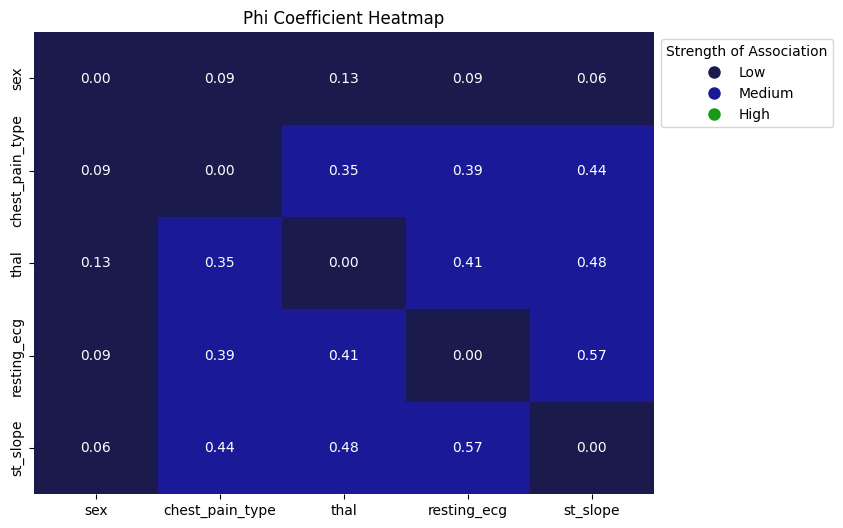

In [434]:
# Define your list of categorical variables
categorical_variables = ['sex', 'chest_pain_type', 'thal', 'resting_ecg', 'st_slope']

# Create an empty matrix to store phi coefficients
phi_matrix = np.zeros((len(categorical_variables), len(categorical_variables)))

# Loop through the pairs of categorical variables
for i, var1 in enumerate(categorical_variables):
    for j, var2 in enumerate(categorical_variables):
        if i == j:
            continue
        
        # Create a contingency table for the pair of variables
        contingency_table = pd.crosstab(df[var1], df[var2])
        
        # Perform a chi-square test to calculate the phi coefficient
        chi2, _, _, _ = chi2_contingency(contingency_table)
        n = min(contingency_table.shape)
        phi_matrix[i, j] = np.sqrt(chi2 / (len(df) * n))
        
# Create a DataFrame from the phi matrix
phi_df = pd.DataFrame(phi_matrix, columns=categorical_variables, index=categorical_variables)

# Define custom colors for low, medium, and high
colors = [(0.1, 0.1, 0.3), (0.1, 0.1, 0.6), (0.1, 0.6, 0.1)]  # Light Blue, Dark Blue, Dark Green

# Create a custom colormap
custom_cmap = sns.color_palette(colors)

# Create a heatmap using the custom colormap
plt.figure(figsize=(8, 6))
sns.heatmap(phi_df, annot=True, cmap=custom_cmap, fmt=".2f", cbar=False, vmin=0, vmax=1)

# Create a custom legend
legend_labels = ['Low', 'Medium', 'High']
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=lab, 
                              markersize=10, markerfacecolor=col) for lab, col in zip(legend_labels, colors)]
legend = plt.legend(handles=legend_patches, title='Strength of Association', loc='upper left', bbox_to_anchor=(1, 1))

plt.title("Phi Coefficient Heatmap")
plt.show()


In [435]:
phi_df

,sex,chest_pain_type,thal,resting_ecg,st_slope
sex,0.000000,0.093287,0.126293,0.087181,0.064188
chest_pain_type,0.093287,0.000000,0.353071,0.390915,0.443306
thal,0.126293,0.353071,0.000000,0.411811,0.480365
resting_ecg,0.087181,0.390915,0.411811,0.000000,0.568278
st_slope,0.064188,0.443306,0.480365,0.568278,0.000000


---

# Phase 2: Data Preprocessing

## 1. Data Preprocessing:

### Check for duplicates and handle them appropriately (e.g., remove duplicates if necessary).

In [436]:
# check for duplicates
print("Sum of duplicated data", df.duplicated().sum())

Sum of duplicated data 0


### Handle missing values:

In [437]:
# missing values 
print(df.isna().sum())  

patient_id                   0
age                         10
sex                          0
chest_pain_type            143
serum_cholestoral           50
fasting_blood_sugar         50
thal                       117
resting_blood_pressure      50
resting_ecg                  0
max_heartrate               61
exercise_induced_angina      0
oldpeak                     50
st_slope                    21
major_vessels               50
real_data                  110
heart_attack                 0
dtype: int64


##### Categorical Variables

In [438]:
# checking value ranges of binary / categorical variables
types_catbin = df.dtypes[(df.dtypes != 'float64') & (df.dtypes != 'int64')]

for i in types_catbin.index:
    print(i, df[i].unique())

sex ['female', 'male', 'unknown']
Categories (3, object): ['female', 'male', 'unknown']
chest_pain_type ['non-anginal pain', 'atypical angina', 'typical angina', NaN, 'unknown']
Categories (4, object): ['atypical angina', 'non-anginal pain', 'typical angina', 'unknown']
thal ['fixed defect', 'reverse defect', NaN, 'normal', 'unknown']
Categories (4, object): ['fixed defect', 'normal', 'reverse defect', 'unknown']
resting_ecg ['normal', 'ST-T wave abnormality', 'showing probable or definite left ventricular..., 'unknown']
Categories (4, object): ['ST-T wave abnormality', 'normal', 'showing probable or definite left ventricular..., 'unknown']
exercise_induced_angina [False  True]
st_slope [NaN, 'flat', 'upsloping', 'unknown']
Categories (3, object): ['flat', 'unknown', 'upsloping']
real_data ['real data' None]
heart_attack [ True False]


##### Numeric variables

In [439]:
# checking value ranges of number variables
types_numeric = df.select_dtypes(include=['number']).columns

df_num = df[types_numeric].join(df['heart_attack'], on='patient_id')

df_num_des = df_num.describe(include='all')
df_num_des.loc['dtype'] = df_num.dtypes
df_num_des.loc['missing'] = df_num.isna().sum()
df_num_des.loc["%s%%count"] = df_num.isnull().mean()
df_num_des.loc['uniques'] = df_num.nunique()

display(df_num_des)

,patient_id,age,serum_cholestoral,fasting_blood_sugar,resting_blood_pressure,max_heartrate,oldpeak,major_vessels,heart_attack
count,353.0,343.0,303.0,303.0,303.0,292.0,303.0,303.0,328
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177
mean,179.470255,54.80758,246.264026,0.148515,131.623762,149.726027,1.039604,0.729373,NaN
std,107.842029,12.484528,51.830751,0.356198,17.538143,23.177493,1.161075,1.022606,NaN
min,0.0,20.0,126.0,0.0,94.0,71.0,0.0,0.0,NaN
25%,88.0,46.0,211.0,0.0,120.0,133.75,0.0,0.0,NaN
50%,176.0,55.0,240.0,0.0,130.0,153.0,0.8,0.0,NaN
75%,264.0,62.0,274.5,0.0,140.0,167.25,1.6,1.0,NaN


#### Boxplotting the outliers of numerical data

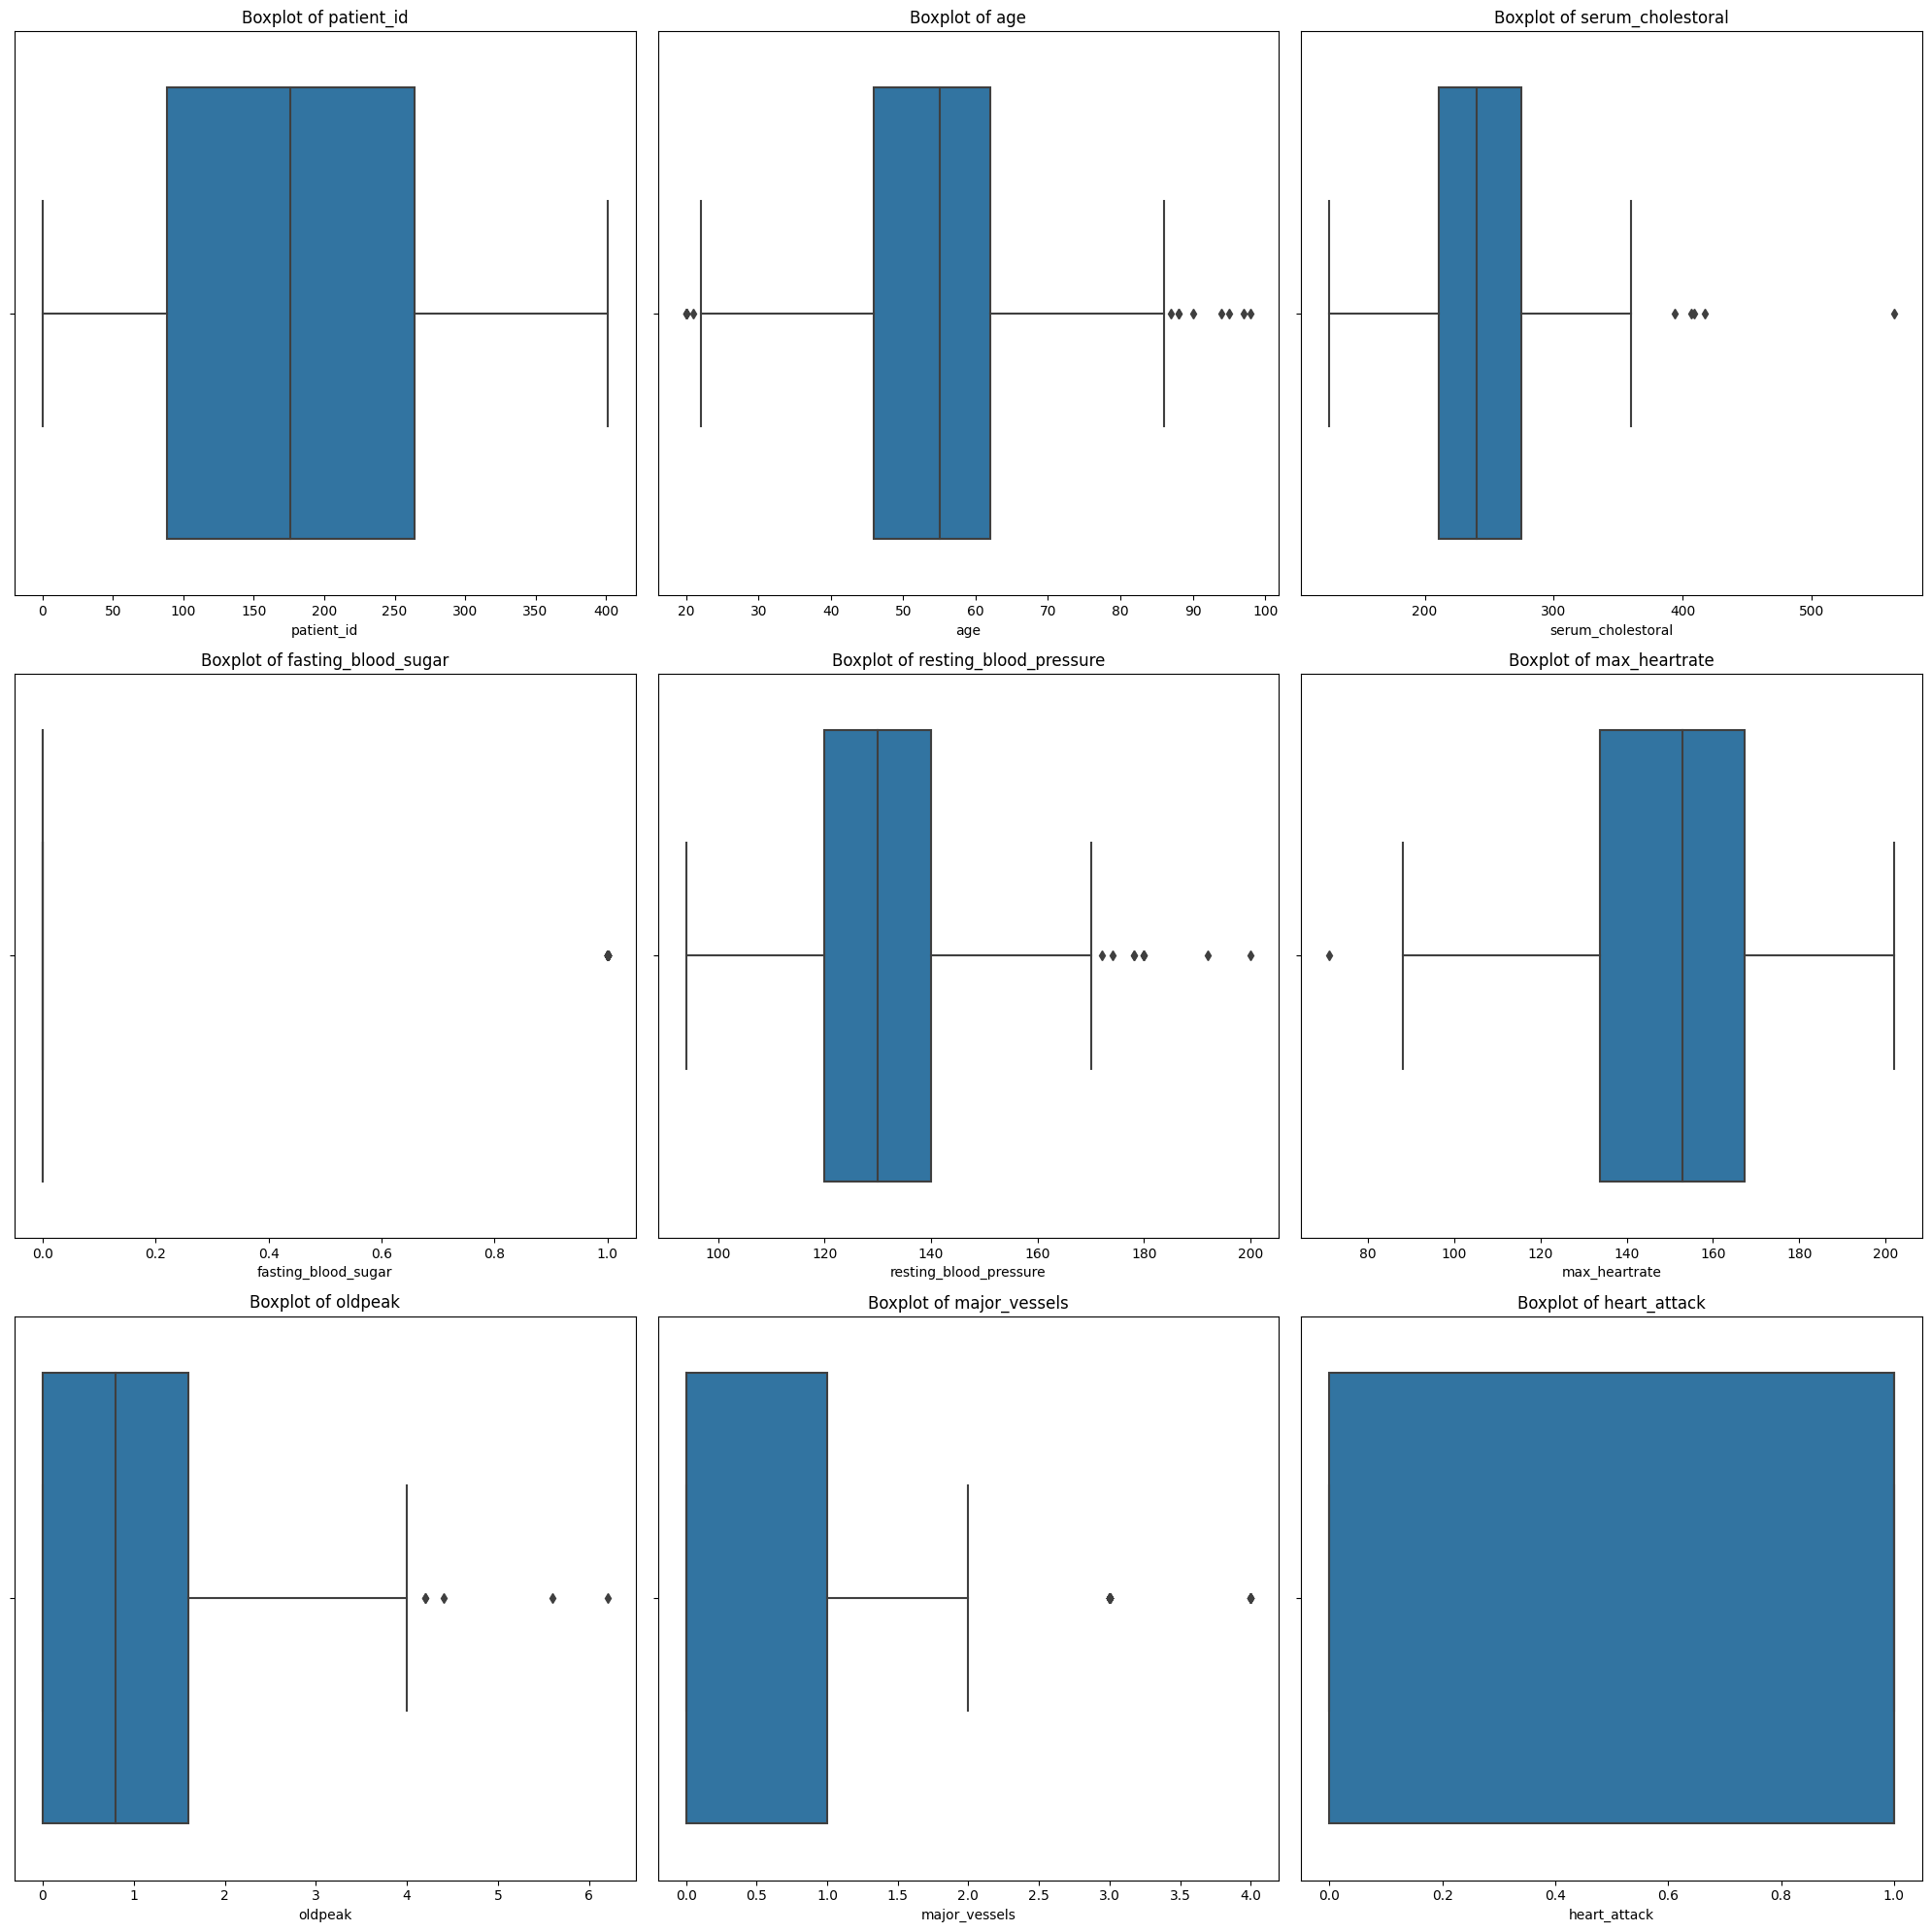

In [440]:
# Create a figure and axes for the grid
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# Loop through each numerical variable and create a boxplot with hue='heart_attack'
for i, variable in enumerate(df_num.columns):
    row, col = divmod(i, 3)  # Calculate the row and column for the current variable
    sns.boxplot(data=df_num, x=variable, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {variable}')
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel(None)  # Remove the y-axis label

# Remove any empty subplots using numpy to flatten
num_variables = len(df_num.columns)
num_rows, num_cols = divmod(num_variables, 3)
axes = axes.flatten()
for i in range(num_variables, 3 * 3):
    fig.delaxes(axes[i])

# Adjust layout and spacing
plt.tight_layout()

# Show the grid of boxplots
plt.show()



In [441]:
df.dtypes

patient_id                    int64
age                         float64
sex                        category
chest_pain_type            category
serum_cholestoral           float64
fasting_blood_sugar         float64
thal                       category
resting_blood_pressure      float64
resting_ecg                category
max_heartrate               float64
exercise_induced_angina        bool
oldpeak                     float64
st_slope                   category
major_vessels               float64
real_data                    object
heart_attack                   bool
dtype: object

* Decide on a strategy for each column with missing values.

In [442]:
#TODO: fill all numerical missing values with median
#TODO: fill all categorical missing values with mode or "unknown"
#TODO: drop df.real_data column so that we can easily switch it on or off.

* For numeric columns, consider imputation with the mean or median.

* For categorical columns, impute with the mode or use a separate category for missing values.

### Handle outliers:

* Detect and decide whether to remove or transform outliers.

In [443]:
#TODO: check for outliers and remove them (z-score, IQR)
# # https://towardsdatascience.com/outlier-detection-part1-821d714524c 

### Encode categorical variables:

* Convert categorical variables like 'sex' and 'chest_pain_type' to appropriate numeric representations.

In [444]:
#TODO: Use label encoding for all categorical variables in df


### Define data types:

- Ensure that each column has the correct data type (e.g., integers for patient_id, floats for age, and categorical for sex).

### Scale your data:

- Experiment with different scaling methods (e.g., StandardScaler, MinMaxScaler).

### Split the data into training and testing sets.

---

# Phase 3: Model Building and Tuning

## 1. Train a Logistic Regression Model

- Import the necessary libraries (e.g., scikit-learn).

- Initialize a logistic regression model.

- Train the model on the training data.

## 2. Hyperparameter Tuning

- Start with a broader hyperparameter search using `RandomizedSearchCV` to explore a wide range of hyperparameters.

   - Define a hyperparameter grid to search through.

- Use cross-validation to evaluate different combinations of hyperparameters.

   - Identify the best hyperparameters based on a suitable evaluation metric.

## 3. Narrow Down Hyperparameters


   - Once you have a range of promising hyperparameters, create a narrower grid for hyperparameter tuning using `GridSearchCV`.

   - Use cross-validation to further fine-tune the model.

## 4. Choose the Right Evaluation Metric


   - Consider the nature of your problem (classification) and the project's goals to select an appropriate evaluation metric (e.g., accuracy, precision, recall, F1-score, ROC AUC).

   - Optimize your model based on this metric.

---

# Phase 4: Model Evaluation and Deployment

### 1. Model Evaluation

- Evaluate the final model on the testing dataset using the chosen evaluation metric.
- Visualize and interpret the results, including confusion matrices and ROC curves.


### 2. Interpretation

- Interpret the coefficients of the logistic regression model to understand the impact of features on the target variable.

### 3. Documentation

- Document your entire workflow, including data preprocessing, model selection, and hyperparameter tuning.
- Include visualizations and explanations for stakeholders.